# Laboratory work #1
For beginning importing libraries.

In [64]:
# Import scikit-learn libraries
# Import preprocessing lib
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
# Import help function
from sklearn.utils.multiclass import type_of_target
from  sklearn.model_selection import train_test_split, GridSearchCV
# Import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
# Import models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# Import other libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

#### Downloading Dataset
Our dataset is Possible Asteroid Impacts with Earth (from [kaggle](https://www.kaggle.com/datasets/nasa/asteroid-impacts))

## Preprocessing Dataset

In [2]:
# Loading dataset to pandas DataFrame
asteroid_df = pd.read_csv("datasets\\asteroid_dataset\\asteroid_classification.csv")

In [3]:
# Getting data from dataframe
print(asteroid_df.head())
# Getting names of column
print("==>Column names<==")
print(f"=>asteroid columns: {asteroid_df.columns.tolist()}")
# Getting size of dataset
print("==>Dataset size<==")
print(f"asteroid shape={asteroid_df.shape}")

    Object Name Object Classification  Epoch (TDB)  Orbit Axis (AU)  \
0      433 Eros         Amor Asteroid        57800           1.4579   
1    719 Albert         Amor Asteroid        57800           2.6385   
2    887 Alinda         Amor Asteroid        57800           2.4787   
3  1036 Ganymed         Amor Asteroid        57800           2.6628   
4     1221 Amor         Amor Asteroid        57800           1.9191   

   Orbit Eccentricity  Orbit Inclination (deg)  Perihelion Argument (deg)  \
0              0.2226                  10.8277                   178.8050   
1              0.5479                  11.5822                   156.1409   
2              0.5671                   9.3561                   350.3482   
3              0.5338                  26.6929                   132.4690   
4              0.4356                  11.8795                    26.6572   

   Node Longitude (deg)  Mean Anomoly (deg)  Perihelion Distance (AU)  \
0              304.3265            31

In [4]:
# Getting info from dataframe
print(asteroid_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15635 entries, 0 to 15634
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Object Name                               15635 non-null  object 
 1   Object Classification                     15635 non-null  object 
 2   Epoch (TDB)                               15635 non-null  int64  
 3   Orbit Axis (AU)                           15635 non-null  float64
 4   Orbit Eccentricity                        15635 non-null  float64
 5   Orbit Inclination (deg)                   15635 non-null  float64
 6   Perihelion Argument (deg)                 15635 non-null  float64
 7   Node Longitude (deg)                      15635 non-null  float64
 8   Mean Anomoly (deg)                        15635 non-null  float64
 9   Perihelion Distance (AU)                  15635 non-null  float64
 10  Aphelion Distance (AU)            

In [3]:
# Drop unnecessary columns for analysis from the dataframe
asteroid_df.drop(["Object Name", "Epoch (TDB)", "Perihelion Argument (deg)", "Node Longitude (deg)",
                          "Mean Anomoly (deg)", "Perihelion Distance (AU)", "Aphelion Distance (AU)",
                          "Minimum Orbit Intersection Distance (AU)", "Orbital Reference"], axis=1, inplace=True)
print(asteroid_df.columns)

Index(['Object Classification', 'Orbit Axis (AU)', 'Orbit Eccentricity',
       'Orbit Inclination (deg)', 'Orbital Period (yr)', 'Asteroid Magnitude'],
      dtype='object')


In [4]:
# Drop null values of dataframe as we have only one null value
asteroid_df.dropna(inplace=True)
asteroid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15634 entries, 0 to 15634
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Object Classification    15634 non-null  object 
 1   Orbit Axis (AU)          15634 non-null  float64
 2   Orbit Eccentricity       15634 non-null  float64
 3   Orbit Inclination (deg)  15634 non-null  float64
 4   Orbital Period (yr)      15634 non-null  float64
 5   Asteroid Magnitude       15634 non-null  float64
dtypes: float64(5), object(1)
memory usage: 855.0+ KB


In [5]:
# Drop the 90% of data in dataframe
asteroid_df_size = asteroid_df.size
asteroid_df = asteroid_df[:int(asteroid_df_size*0.1)]

In [8]:
# Get the description of the dataframe
print(asteroid_df.describe())

       Orbit Axis (AU)  Orbit Eccentricity  Orbit Inclination (deg)  \
count      9380.000000         9380.000000              9380.000000   
mean          1.786934            0.456994                13.701426   
std           0.599254            0.175598                11.841897   
min           0.547600            0.006200                 0.021000   
25%           1.323325            0.330500                 5.054750   
50%           1.747150            0.467850                 9.792850   
75%           2.221950            0.579025                19.876325   
max          17.818700            0.969500               154.375100   

       Orbital Period (yr)  Asteroid Magnitude  
count          9380.000000         9380.000000  
mean              2.485915           21.578613  
std               1.400086            3.056270  
min               0.410000            9.450000  
25%               1.520000           19.300000  
50%               2.310000           21.200000  
75%              

In [9]:
# View class names
print(set(asteroid_df["Object Classification"]))

{'Apohele Asteroid', 'Amor Asteroid (Hazard)', 'Aten Asteroid (Hazard)', 'Apollo Asteroid (Hazard)', 'Aten Asteroid', 'Apollo Asteroid', 'Amor Asteroid', 'Apohele Asteroid (Hazard)'}


In [10]:
# View count of class names
print(asteroid_df.iloc[:, 0].value_counts())

Apollo Asteroid              3918
Amor Asteroid                3484
Apollo Asteroid (Hazard)     1157
Aten Asteroid                 609
Aten Asteroid (Hazard)        130
Amor Asteroid (Hazard)         71
Apohele Asteroid                8
Apohele Asteroid (Hazard)       3
Name: Object Classification, dtype: int64


In [6]:
# Change class names
asteroid_df["Object Classification"].mask(asteroid_df["Object Classification"] == "Apollo Asteroid" ,
                                          "Apollo", inplace=True)
asteroid_df["Object Classification"].mask(asteroid_df["Object Classification"] == "Aten Asteroid",
                                          "Aten", inplace=True)
asteroid_df["Object Classification"].mask(asteroid_df["Object Classification"] == "Amor Asteroid",
                                          "Amor", inplace=True)
asteroid_df["Object Classification"].mask(asteroid_df["Object Classification"] == "Apohele Asteroid",
                                          "Apohele", inplace=True)
# Drop unnecessary class
necessary_class = ["Apollo", "Aten", "Amor"]
asteroid_df = asteroid_df[asteroid_df["Object Classification"].isin(necessary_class)]

In [12]:
# View class names
print(set(asteroid_df["Object Classification"]))

{'Apollo', 'Aten', 'Amor'}


In [13]:
# View count of class names
print(asteroid_df.iloc[:, 0].value_counts())

Apollo    3918
Amor      3484
Aten       609
Name: Object Classification, dtype: int64


In [14]:
print(asteroid_df["Object Classification"].head())
print(asteroid_df.info())

0    Amor
1    Amor
2    Amor
3    Amor
4    Amor
Name: Object Classification, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8011 entries, 0 to 9380
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Object Classification    8011 non-null   object 
 1   Orbit Axis (AU)          8011 non-null   float64
 2   Orbit Eccentricity       8011 non-null   float64
 3   Orbit Inclination (deg)  8011 non-null   float64
 4   Orbital Period (yr)      8011 non-null   float64
 5   Asteroid Magnitude       8011 non-null   float64
dtypes: float64(5), object(1)
memory usage: 438.1+ KB
None


## Creating functions for visualise data

In [7]:
def boxplot_data(dataframe, features, target_features):
    """Function to show boxplot of dataframe;
    :param dataframe: pandas DataFrame with data;
    :param features: list with features name from dataframe;
    :param target_features: number of target feature.
    """
    # Define plot variables
    n = len(features)
    cols = 3
    rows = int(n/cols)
    features_iter = 0

    # Build plot
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(25, 23))
    for i in range(rows):
        for j in range(cols):
            if features_iter == target_features:
                features_iter += 1
                continue
            sns.boxplot(x=features[target_features], y=features[features_iter], data=dataframe, ax=ax[i][j])
            features_iter += 1

    plt.show()

def remove_outliers(dataframe, features):
    """Function to remove the outliers;
    :param dataframe: pandas DataFrame with data;
    :param features: list with features from dataframe.
    """
    # Copy dataframe to another variable
    dataframe_copy = dataframe.copy()

    # Iterate through features
    for feature in features:
        if dataframe[feature].dtype == object:
            continue
        # Calculate q1, q3 and iqr
        q3 = dataframe[feature].quantile(0.75)
        q1 = dataframe[feature].quantile(0.25)
        iqr = q3 - q1

        # Get local minimum and maximum
        local_min = q1 - (1.5 * iqr)
        local_max = q3 + (1.5 * iqr)

        # Remove the outliers
        dataframe_copy = dataframe_copy[(dataframe_copy[feature] >= local_min) &
                                        (dataframe_copy[feature] <= local_max)]

    return dataframe_copy

def histogram_data(dataframe, features):
    """Function to show histogram of dataframe;
    :param dataframe: pandas DataFrame with data;
    :param features: list with features from dataframe.
    """
    # Define plot variables
    n = len(features)
    cols = 3
    rows = int(n/cols)
    features_iter = 1

    # Build plot
    fig, ax = plt.subplots(ncols=cols, figsize=(24, 20))
    for i in range(rows):
        for j in range(cols):
            if len(features) <= features_iter:
                break
            sns.histplot(x=features[features_iter], y=features[features_iter+1],
                         data=dataframe, ax=ax[j])
            features_iter += 1
            plt.show()


## Visualising Dataset

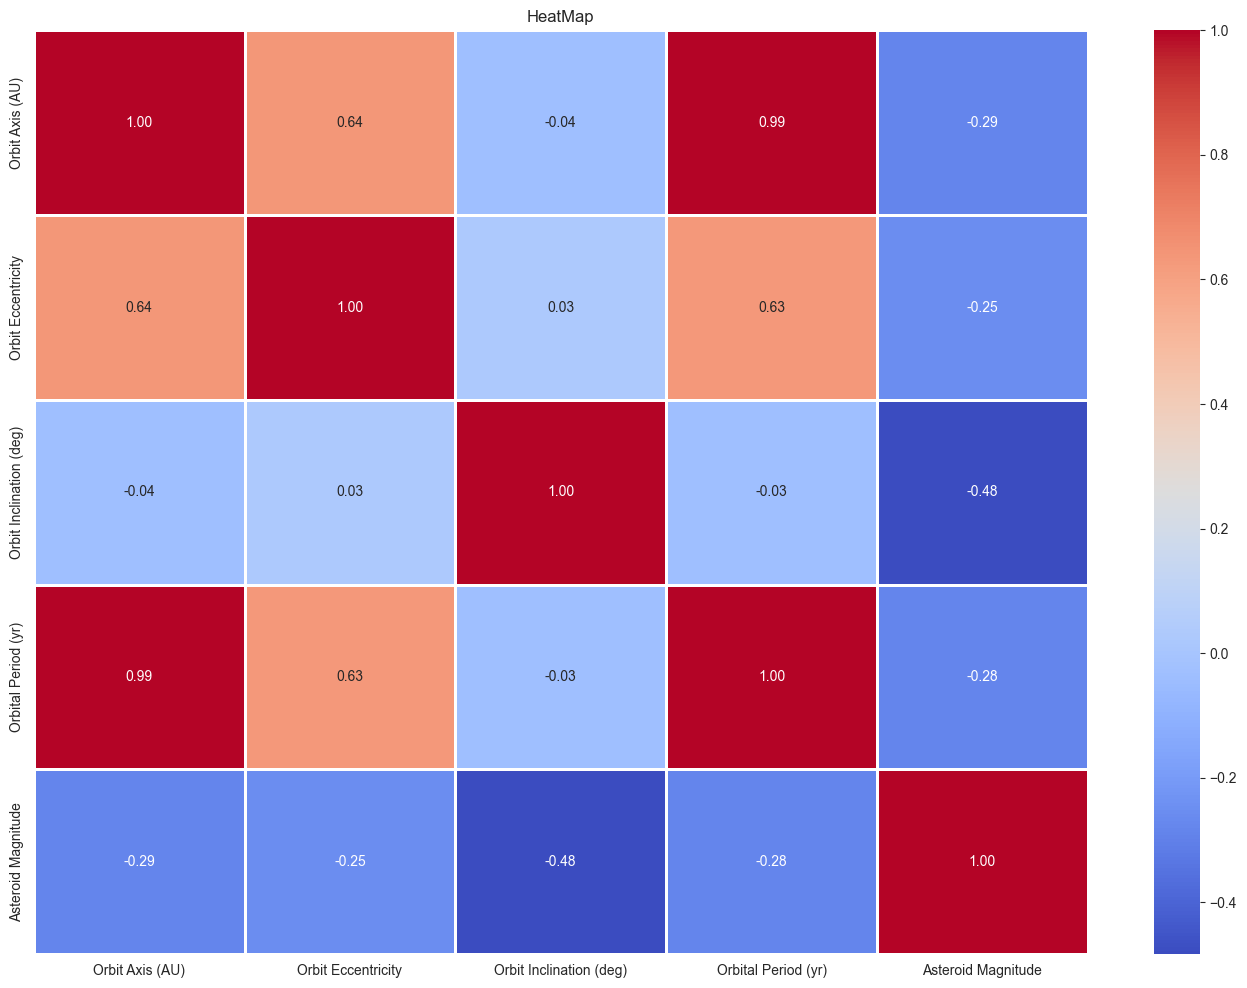

In [16]:
# Visualising with heatmap
plt.figure(figsize=(17, 12))
heat_map = sns.heatmap(asteroid_df.corr(numeric_only=True), cmap="coolwarm", linewidths=1, annot=True, fmt=".2f")
plt.title("HeatMap")
plt.show()

In [8]:
# Extract features from the df
asteroid_features = asteroid_df.columns.tolist()
print(asteroid_features)

['Object Classification', 'Orbit Axis (AU)', 'Orbit Eccentricity', 'Orbit Inclination (deg)', 'Orbital Period (yr)', 'Asteroid Magnitude']


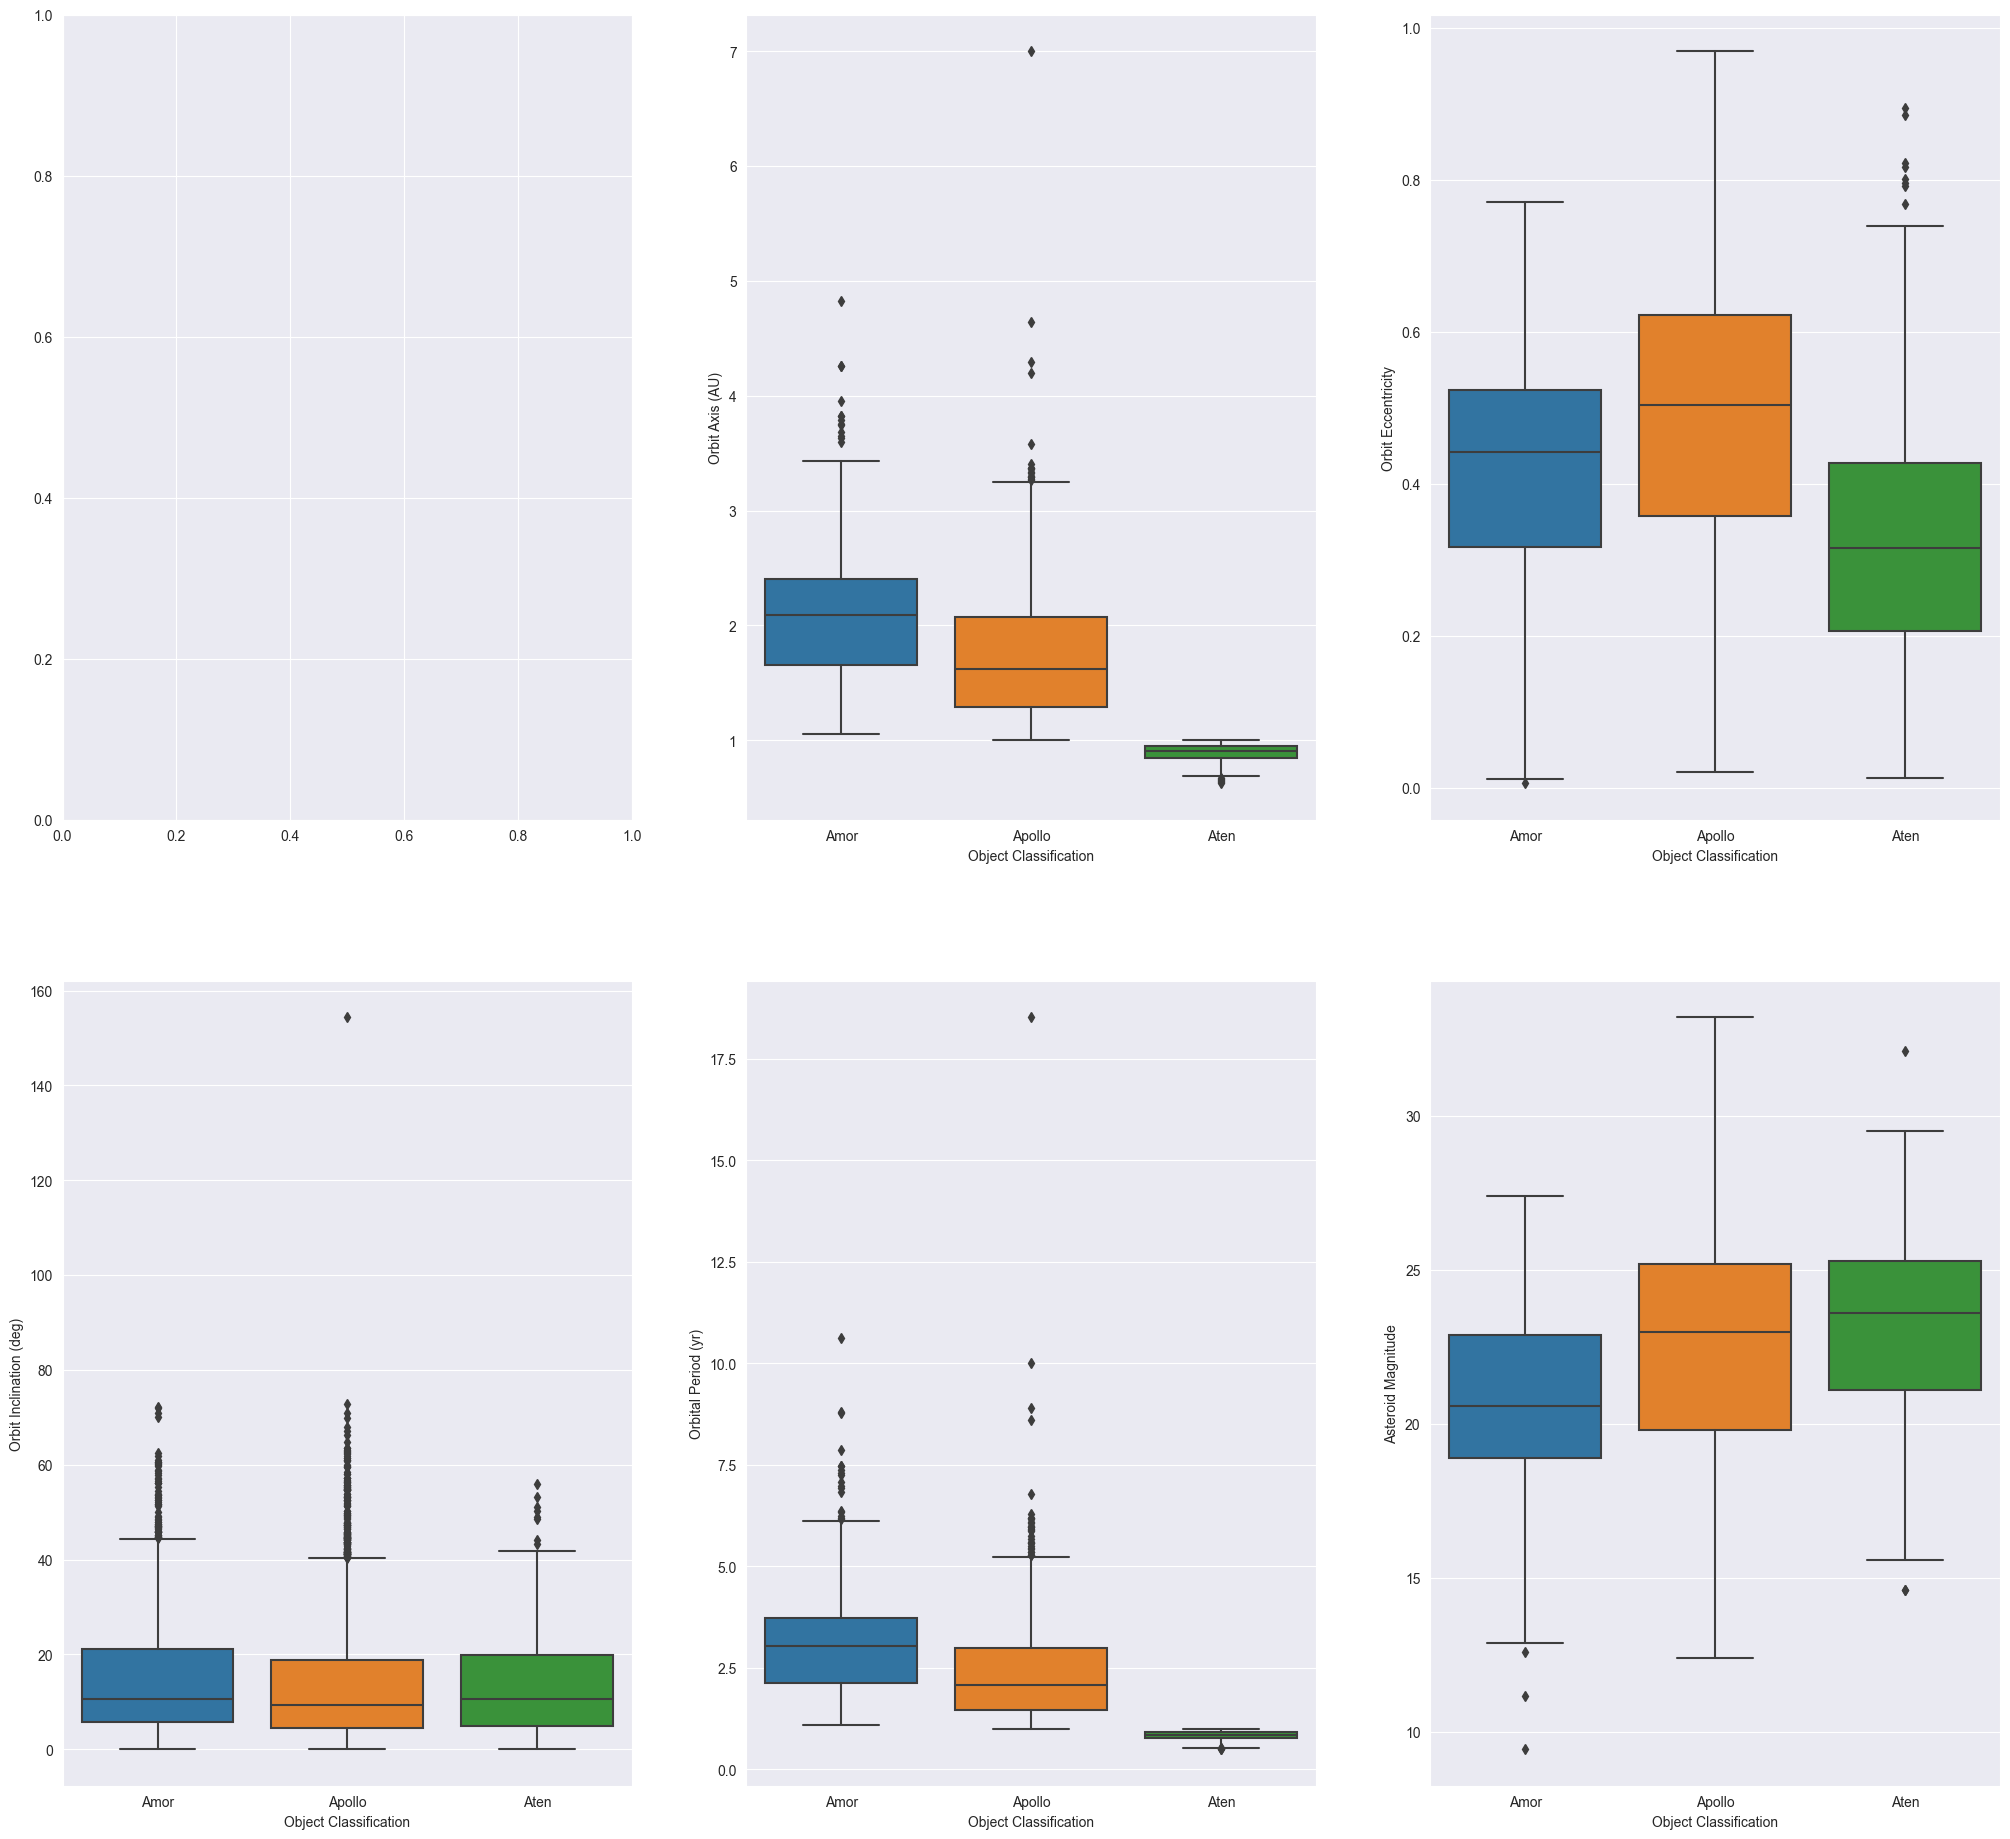

In [18]:
# Show boxplot to check for outliers
boxplot_data(asteroid_df, asteroid_features, 0)

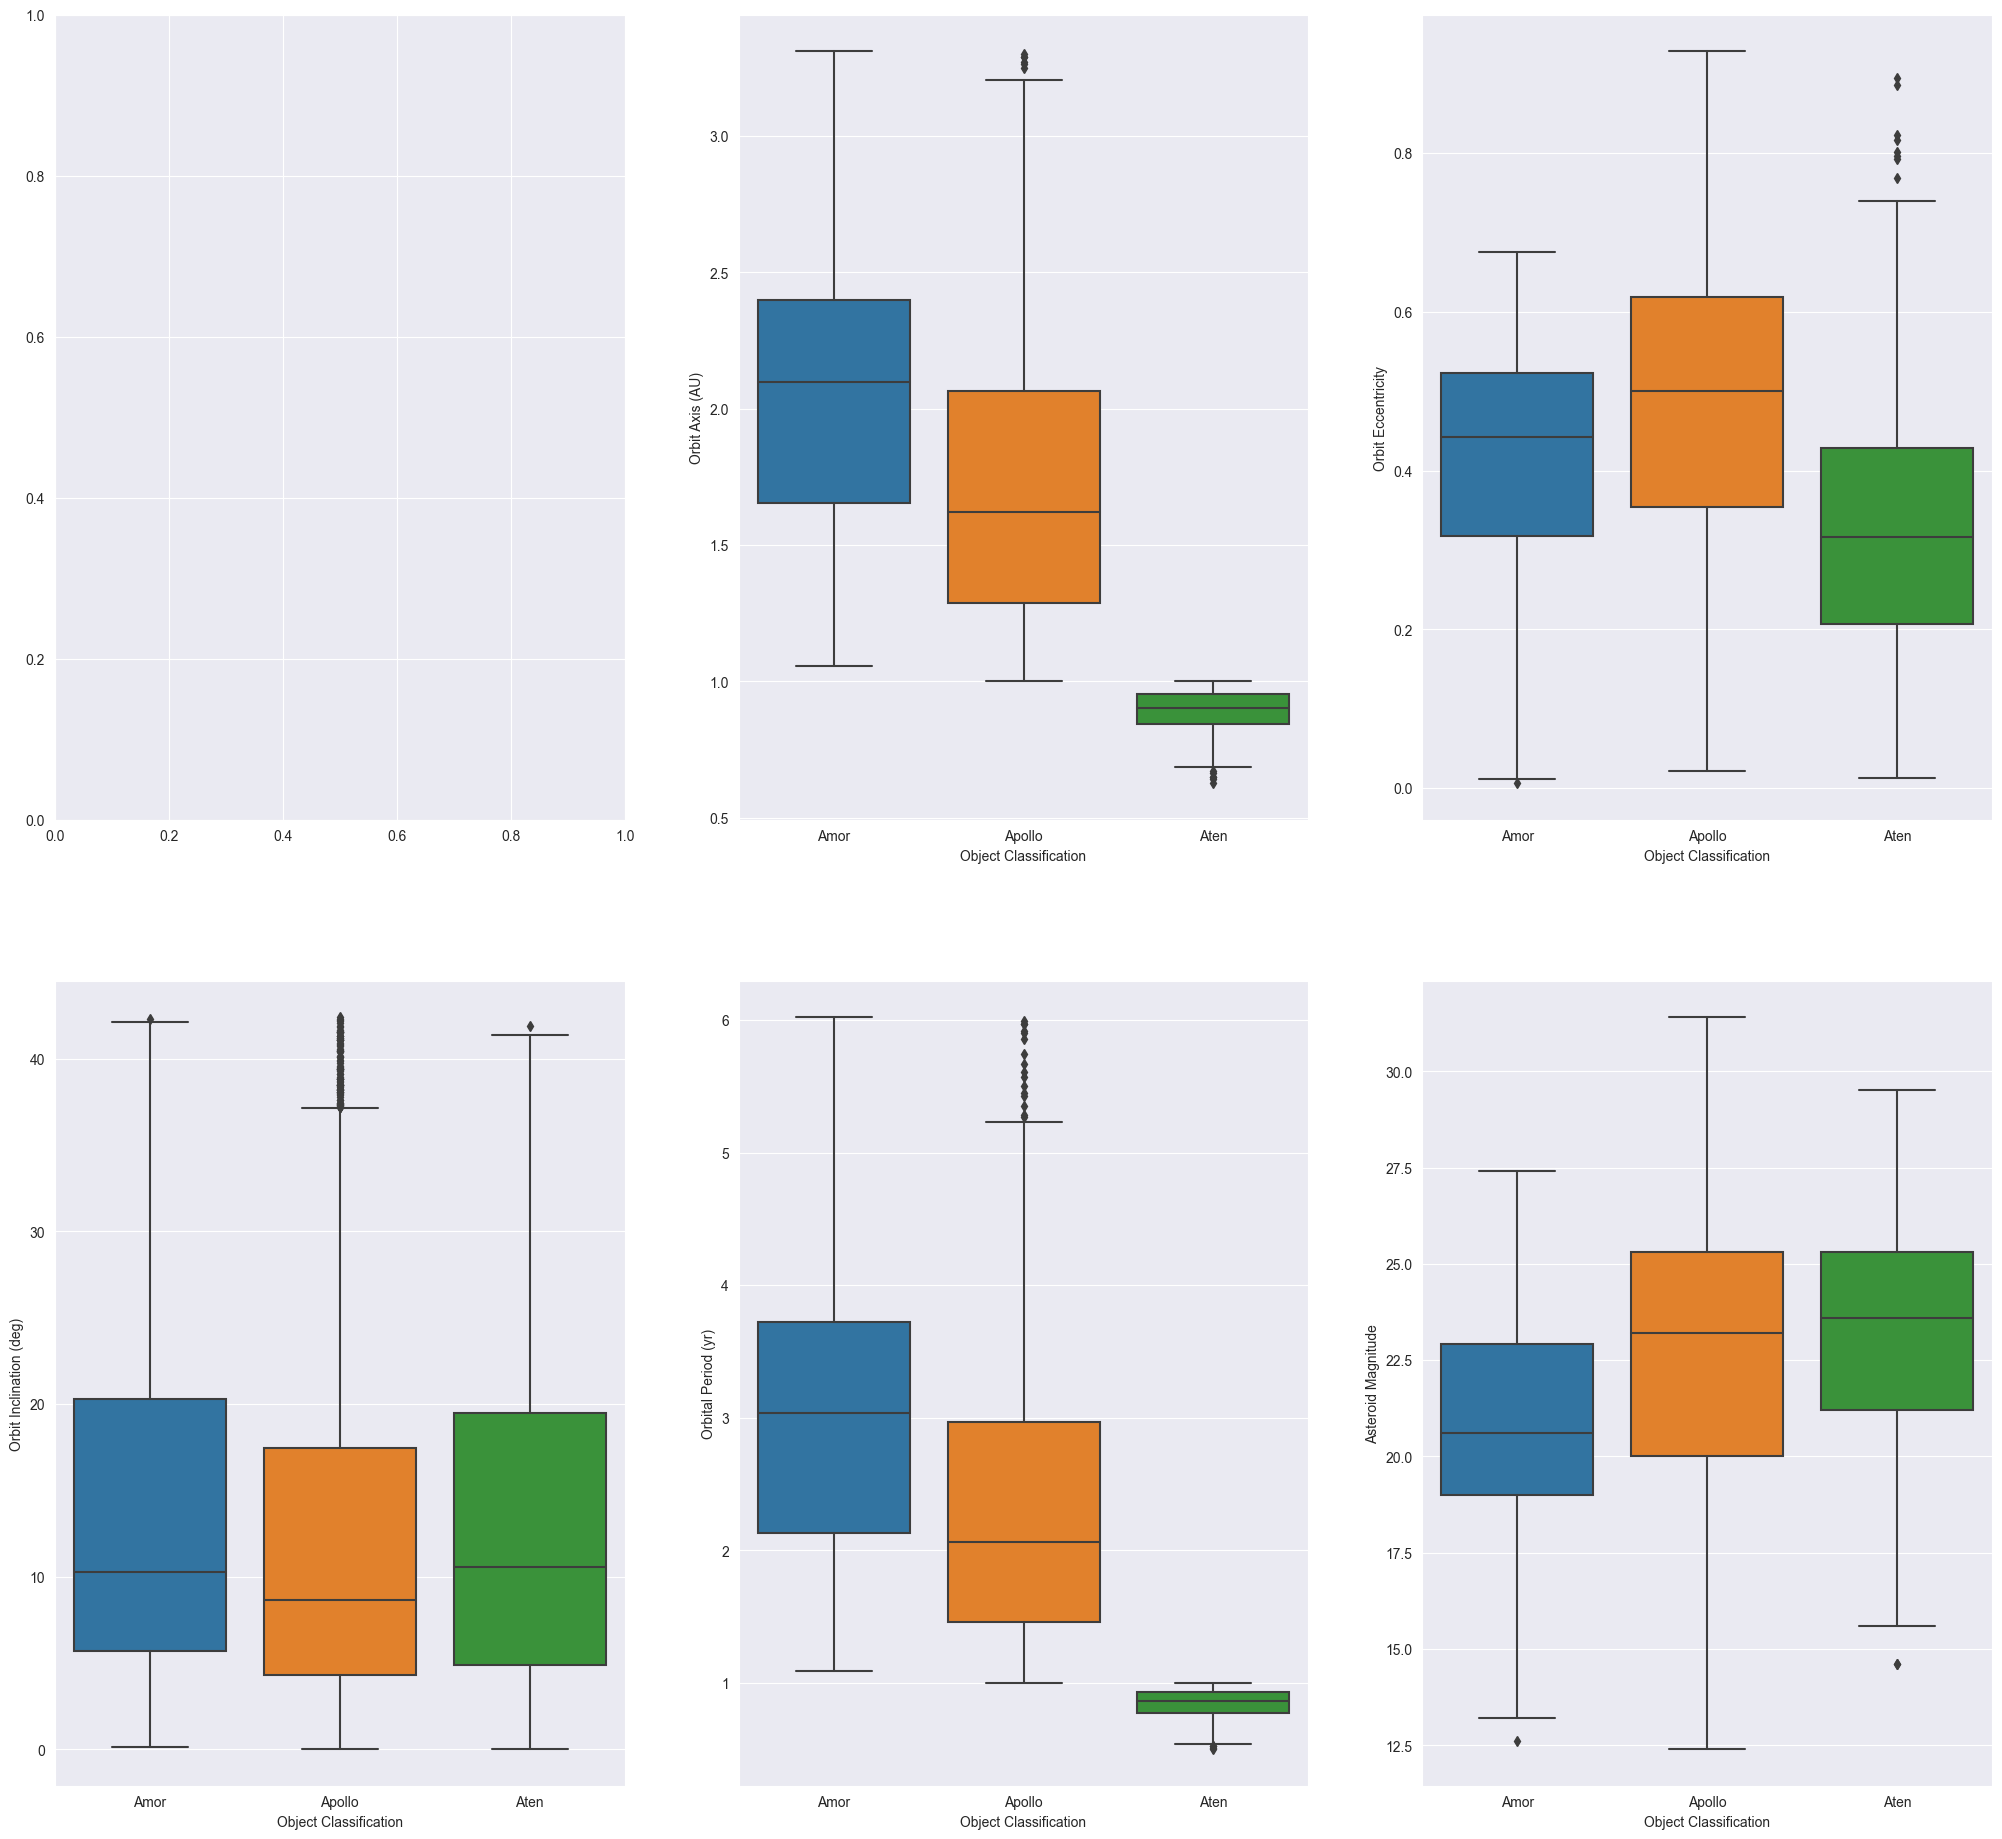

In [9]:
# Remove outliers from the dataframe
asteroid_df = remove_outliers(asteroid_df, asteroid_features)

# Show the boxplot
boxplot_data(asteroid_df, asteroid_features, 0)

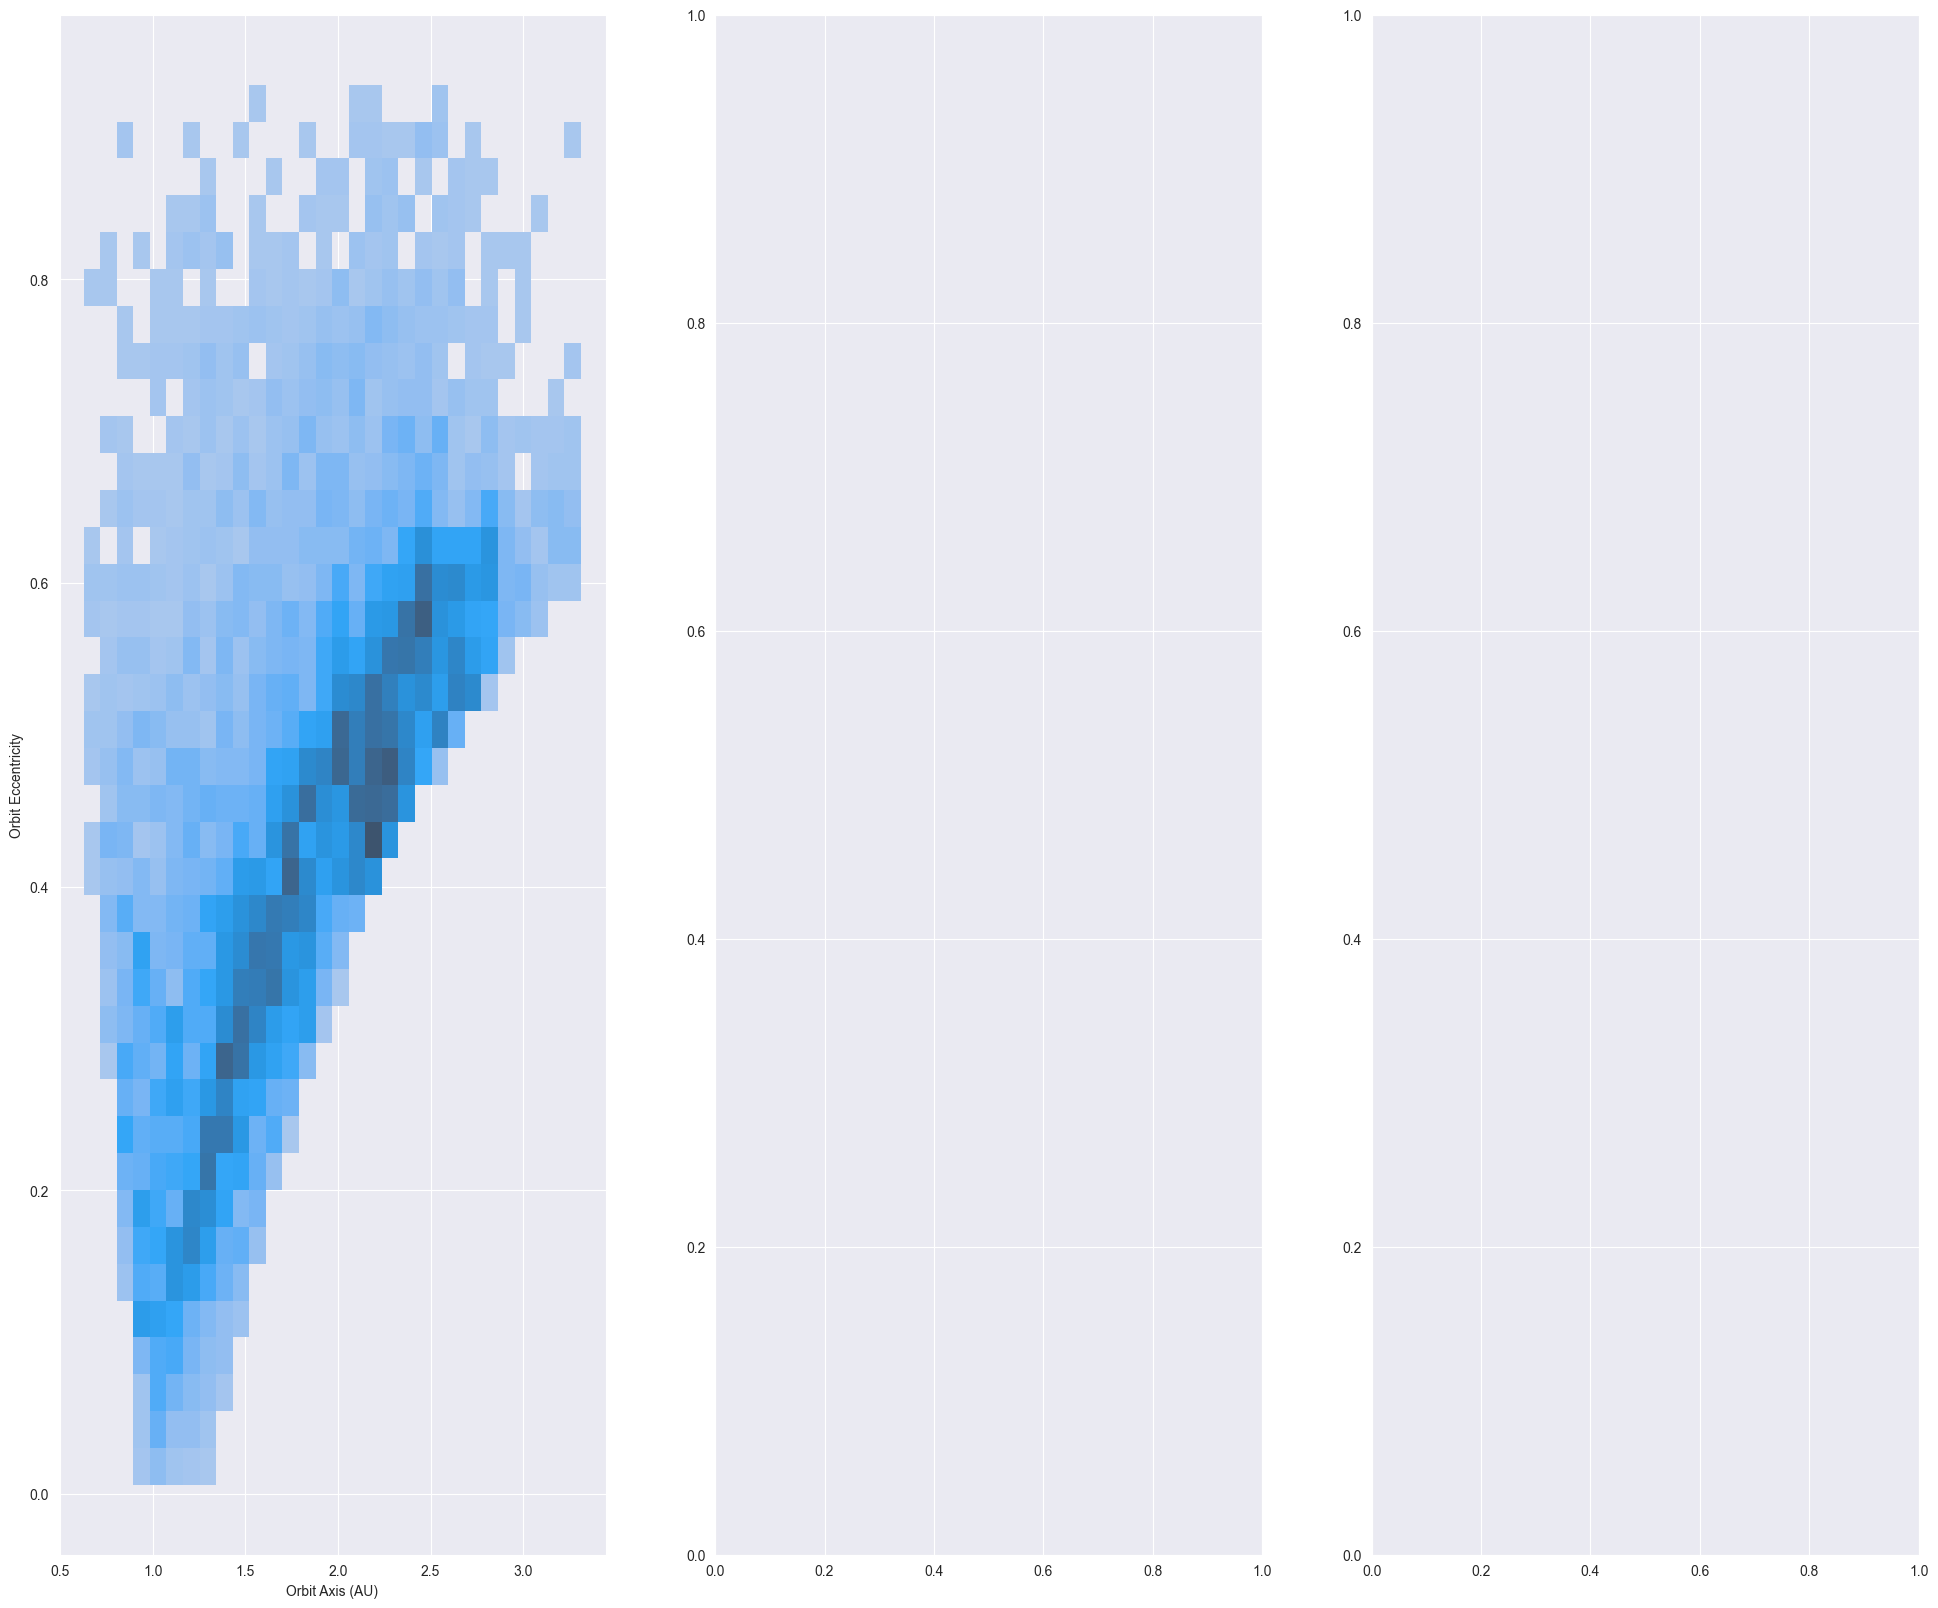

IndexError: list index out of range

In [20]:
# Show histogram plot for our dataframe
histogram_data(asteroid_df, asteroid_features)

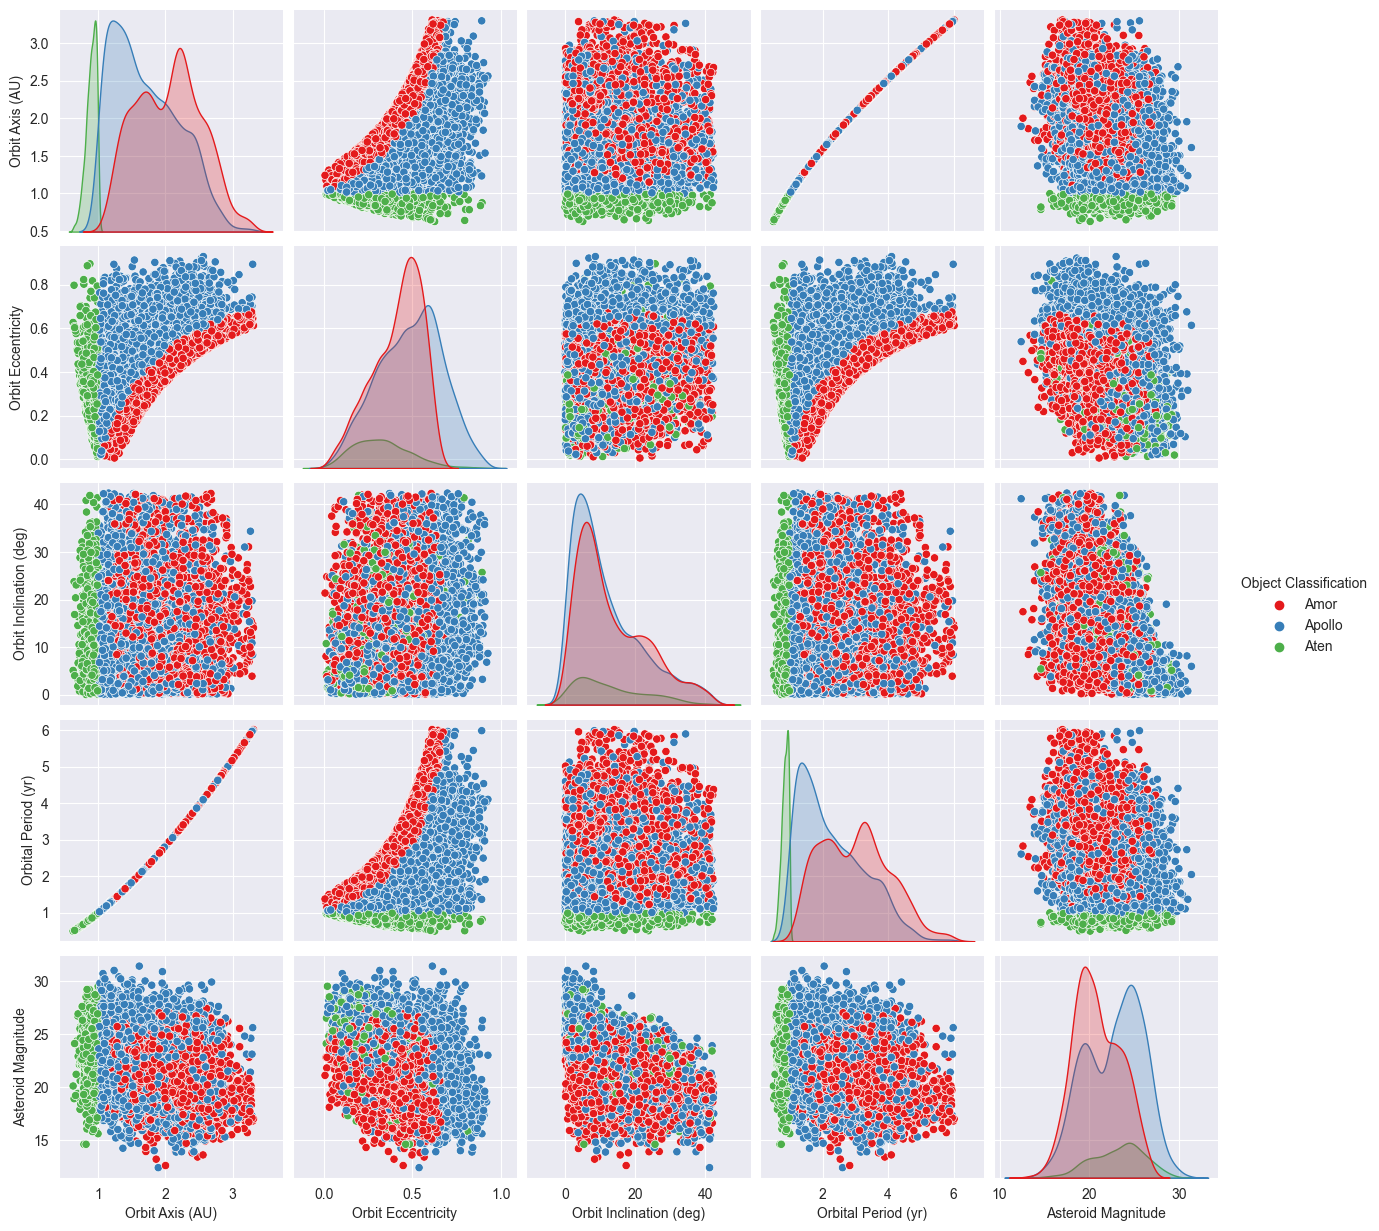

In [21]:
# Show pair plot for our features
sns.pairplot(asteroid_df, hue=asteroid_features[0], palette="Set1")

## Normalizing Dataset

In [116]:
# Create normalized dataset
norm_asteroid_df = asteroid_df.copy()
# apply normalization techniques
for column in norm_asteroid_df:
    if norm_asteroid_df[column].dtype == object:
        continue
    norm_asteroid_df[column] = norm_asteroid_df[column] / norm_asteroid_df[column].abs().max()

In [11]:
# View normalized Dataset
print(norm_asteroid_df.head())

  Object Classification  Orbit Axis (AU)  Orbit Eccentricity  \
1                  Amor         0.796889            0.590282   
2                  Amor         0.748626            0.610967   
4                  Amor         0.579613            0.469295   
8                  Amor         0.562609            0.427279   
9                Apollo         0.412957            0.469619   

   Orbit Inclination (deg)  Orbital Period (yr)  Asteroid Magnitude  
1                 0.273170             0.712625            0.493631  
2                 0.220667             0.647841            0.426752  
4                 0.280182             0.441860            0.563694  
8                 0.199325             0.421927            0.420382  
9                 0.221247             0.265781            0.453185  


In [24]:
asteroid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7746 entries, 1 to 9380
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Object Classification    7746 non-null   object 
 1   Orbit Axis (AU)          7746 non-null   float64
 2   Orbit Eccentricity       7746 non-null   float64
 3   Orbit Inclination (deg)  7746 non-null   float64
 4   Orbital Period (yr)      7746 non-null   float64
 5   Asteroid Magnitude       7746 non-null   float64
dtypes: float64(5), object(1)
memory usage: 423.6+ KB


## Split Dataset to Train & Test

In [117]:
# Get x & y variables (data & labels)
x = norm_asteroid_df.drop(["Object Classification"], axis=1)
y = norm_asteroid_df["Object Classification"]

In [118]:
# Create train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [27]:
# View splitting result
print(type(X_train), type(y_train))
print(X_train.shape, y_train.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(6196, 5) (6196,)


In [20]:
# View class names
class_names = list(y)
print(class_names)

['Apollo', 'Aten', 'Amor']


## Creating Help functions for evaluating model

In [74]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used;
    :param y_true: Array of truth labels (must be same shape as y_pred);
    :param y_pred: Array of predicted labels (must be same shape as y_true);
    :param classes: Array of class labels (e.g. string form). If `None`, integer labels are used;
    :param figsize: Size of output figure (default=(10, 10));
    :param text_size: Size of output figure text (default=15);
    :param norm: normalize values or not (default=False);
    :param savefig: save confusion matrix to file (default=False).

    :returns: A labelled confusion matrix plot comparing y_true and y_pred.

    Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
    """
    # Create the confusion matrix
    type_true = type_of_target(y_true)
    if type_true == "multilabel-indicator":
        confusion_mx = multilabel_confusion_matrix(y_true, y_pred)
        print(confusion_mx)
    else:
        confusion_mx = confusion_matrix(y_true, y_pred)
    confusion_mx_norm = confusion_mx.astype("float") / confusion_mx.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = confusion_mx.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(confusion_mx, cmap=plt.cm.Greens) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(confusion_mx.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will label with class names (if they exist) or ints
         yticklabels=labels)

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (confusion_mx.max() + confusion_mx.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(confusion_mx.shape[0]), range(confusion_mx.shape[1])):
        if norm:
            plt.text(j, i, f"{confusion_mx[i, j]} ({confusion_mx_norm[i, j]*100:.1f}%)",
                     horizontalalignment="center",
                     color="white" if confusion_mx[i, j] > threshold else "black",
                     size=text_size)
        else:
            plt.text(j, i, f"{confusion_mx[i, j]}",
                     horizontalalignment="center",
                     color="white" if confusion_mx[i, j] > threshold else "black",
                     size=text_size)

    # Save the figure to the current working directory
    if savefig:
        fig.savefig("confusion_matrix.png")


def classification_confusion_evaluation(y_true, y_pred, classes=None):
    """

    :param y_true:
    :param y_pred:
    :param classes:
    """
    model_accuracy = accuracy_score(y_true, y_pred)

    print("==>Classification Report<==")
    print(classification_report(y_true, y_pred))
    print("==>Confusion Matrix<==")
    make_confusion_matrix(y_true, y_pred, classes)
    print("==========================")
    print("==>Model accuracy: {:.2f}".format(model_accuracy))

## Training Classification Algorithms

### Decision Tree

In [119]:
# Define Decision Tree with "gini" criteria and max depth of tree as 7
decision_tree = DecisionTreeClassifier(criterion="gini", max_depth=7)

In [120]:
# Train the model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [121]:
# Take a prediction from the model
tree_y_pred = decision_tree.predict(X_test)

#### Model Evaluation

==>Classification Report<==
              precision    recall  f1-score   support

        Amor       0.89      0.90      0.90       661
      Apollo       0.92      0.91      0.91       793
        Aten       1.00      1.00      1.00        96

    accuracy                           0.91      1550
   macro avg       0.94      0.94      0.94      1550
weighted avg       0.91      0.91      0.91      1550

==>Confusion Matrix<==
==>Model accuracy: 0.91


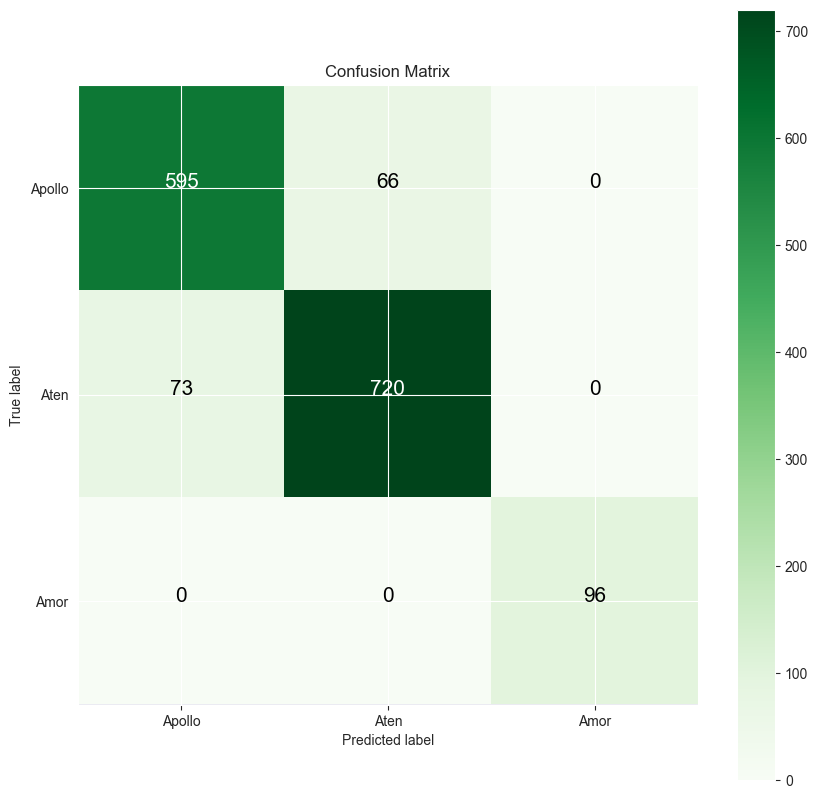

In [122]:
# View model classification report (with precision, recall and f1-score) and confusion matrix
classification_confusion_evaluation(y_test, tree_y_pred, class_names)

#### Model Visualization

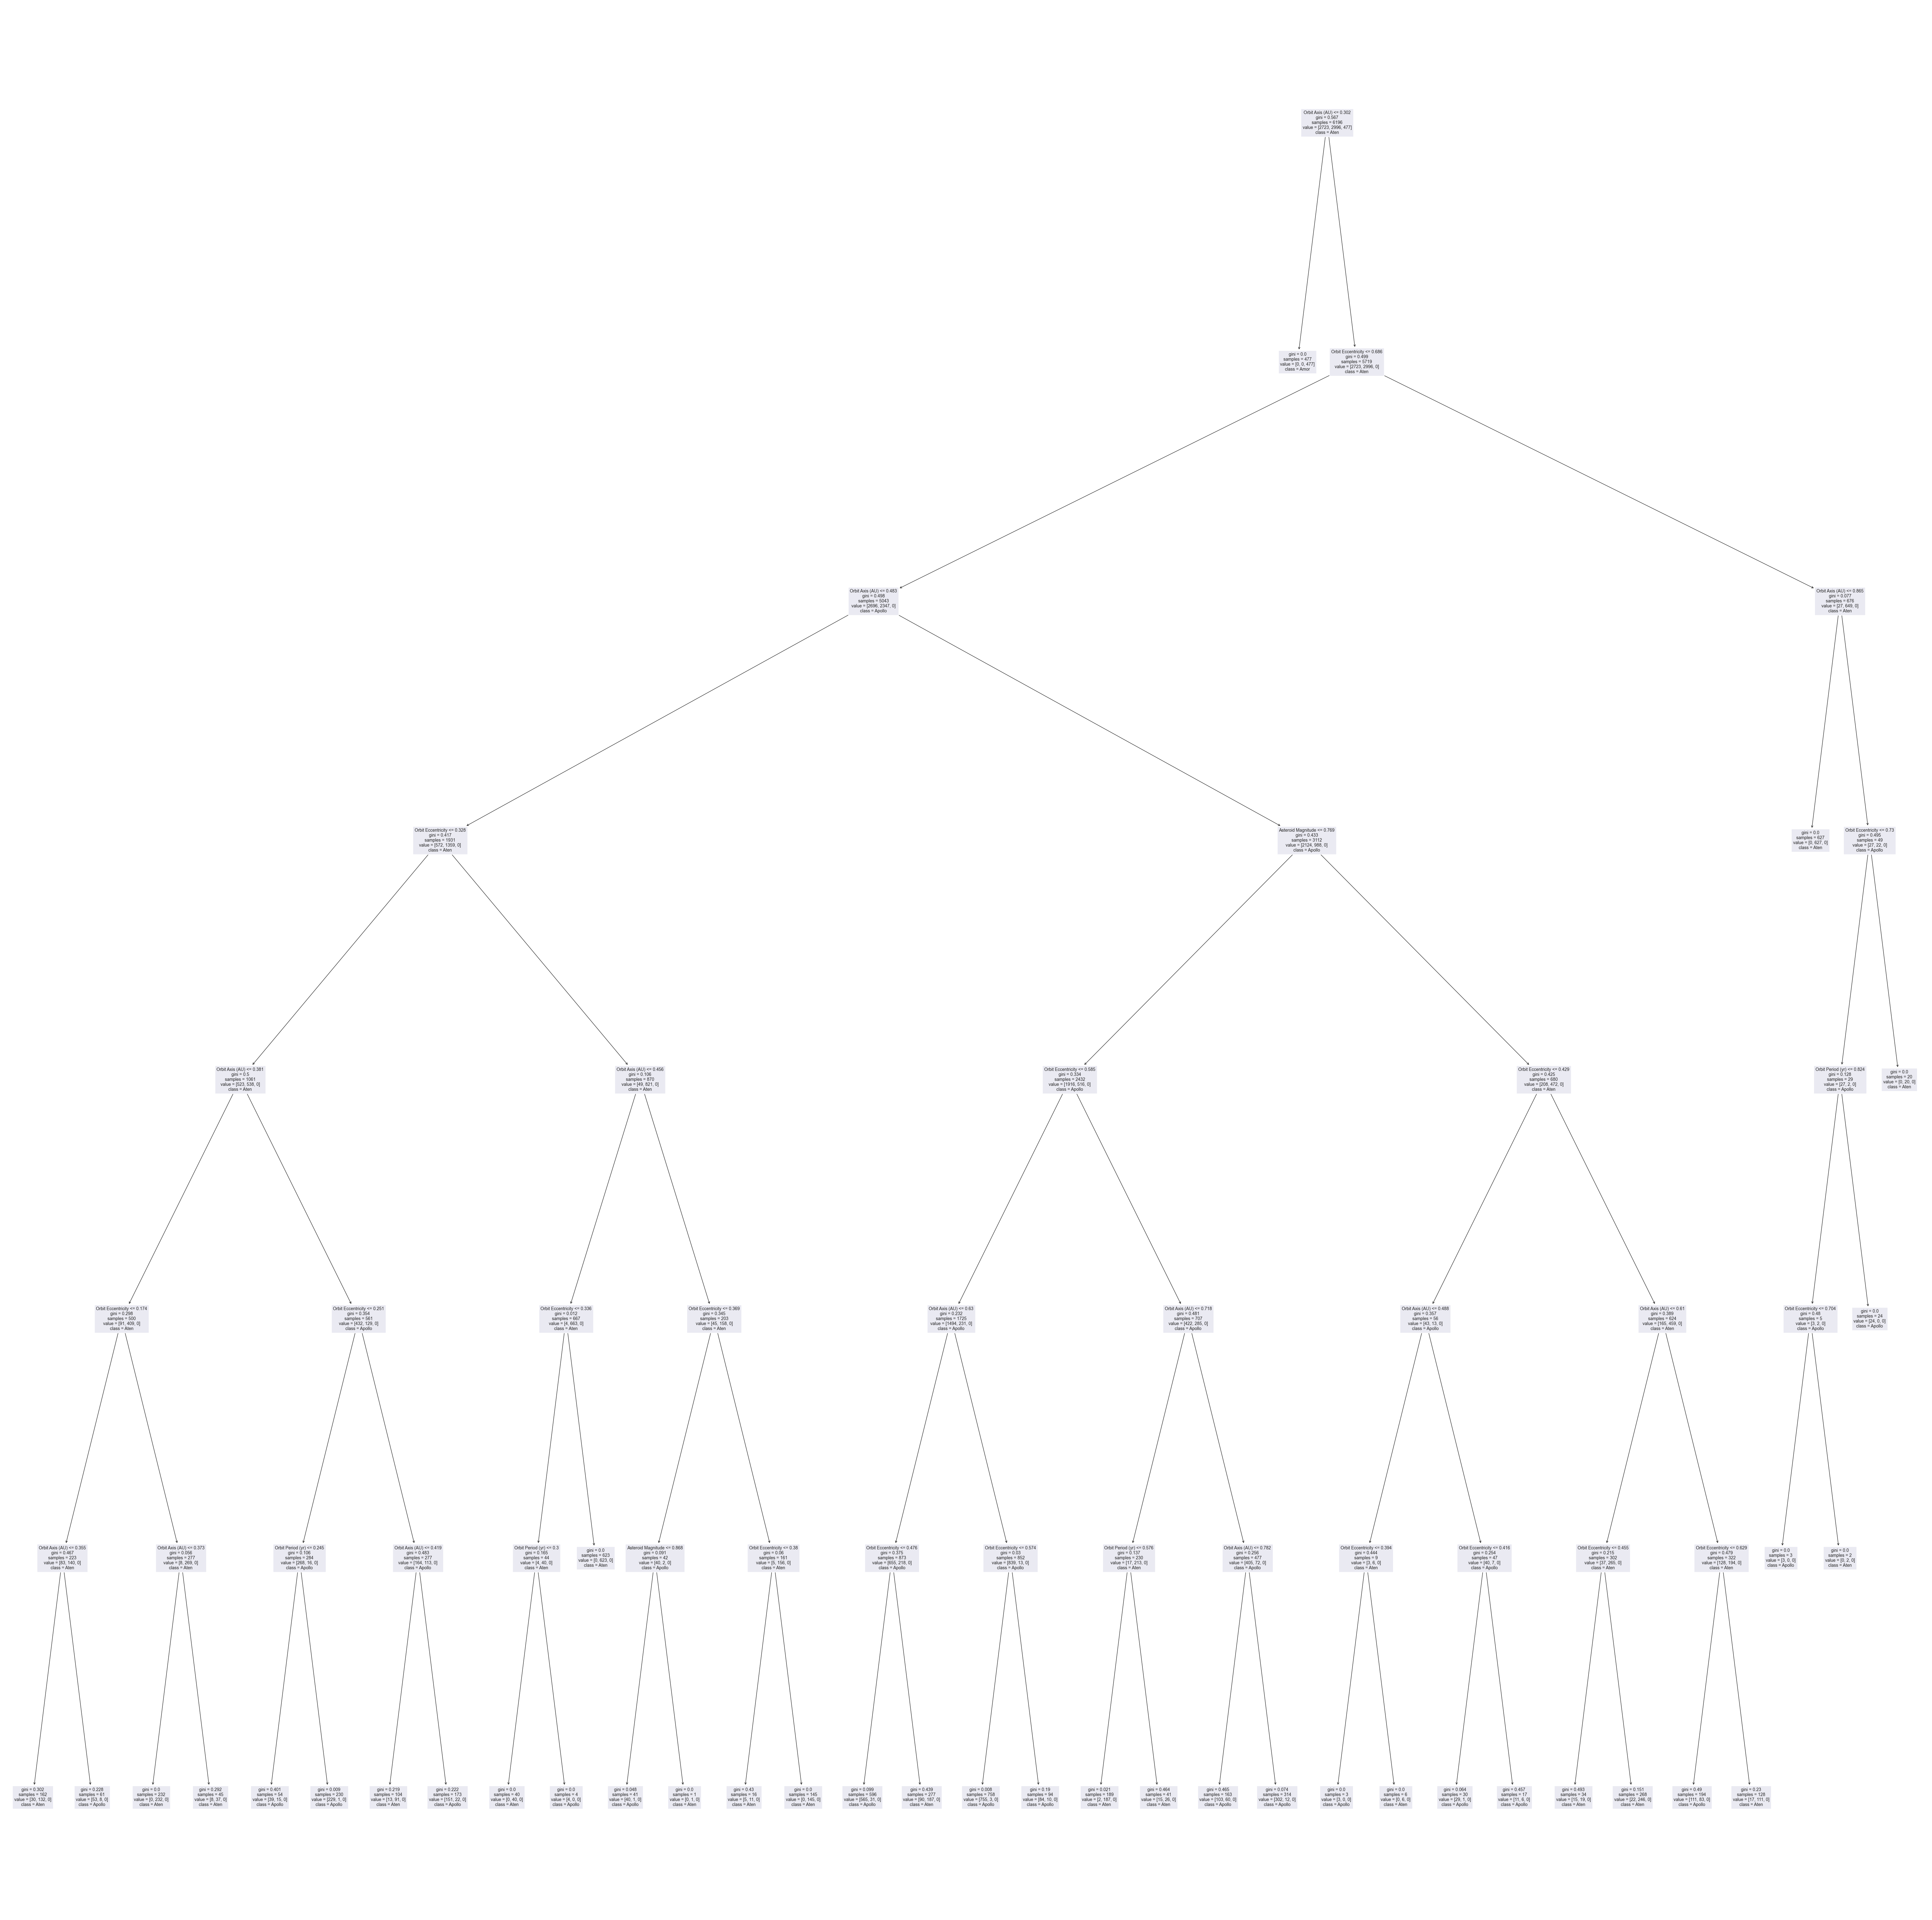

In [36]:
# Make visualization of our Decision Tree model
plt.figure(figsize=(80, 80))
plot_tree(decision_tree, feature_names=["Orbit Axis (AU)", "Orbit Eccentricity", "Orbit Inclination (deg)",
                                "Orbit Period (yr)", "Asteroid Magnitude"],
          class_names=["Apollo", "Aten", "Amor"])
plt.show()

### Random Forest

In [106]:
# One-hot Encoding the Object Classification Feature
one_hot = OneHotEncoder()
# Copy our dataset
norm_onehot_asteroid_df = norm_asteroid_df.copy()
# Fitting one-hot encoder
encoded = one_hot.fit_transform(norm_asteroid_df[["Object Classification"]])
norm_onehot_asteroid_df[one_hot.categories_[0]] = encoded.toarray()
# Drop unnecessary "Object Classification" feature
norm_onehot_asteroid_df.drop(["Object Classification"], axis=1, inplace=True)
print(norm_onehot_asteroid_df.head())

   Orbit Axis (AU)  Orbit Eccentricity  Orbit Inclination (deg)  \
1         0.796889            0.590282                 0.273170   
2         0.748626            0.610967                 0.220667   
4         0.579613            0.469295                 0.280182   
8         0.562609            0.427279                 0.199325   
9         0.412957            0.469619                 0.221247   

   Orbital Period (yr)  Asteroid Magnitude  Amor  Apollo  Aten  
1             0.712625            0.493631   1.0     0.0   0.0  
2             0.647841            0.426752   1.0     0.0   0.0  
4             0.441860            0.563694   1.0     0.0   0.0  
8             0.421927            0.420382   1.0     0.0   0.0  
9             0.265781            0.453185   0.0     1.0   0.0  


In [107]:
# Change data type in one-hot encoded column
column_dtype_dict = {"Amor": int,
                     "Apollo": int,
                     "Aten": int}
norm_onehot_asteroid_df = norm_onehot_asteroid_df.astype(column_dtype_dict)
print(norm_onehot_asteroid_df.dtypes)
print(norm_onehot_asteroid_df.head())

Orbit Axis (AU)            float64
Orbit Eccentricity         float64
Orbit Inclination (deg)    float64
Orbital Period (yr)        float64
Asteroid Magnitude         float64
Amor                         int32
Apollo                       int32
Aten                         int32
dtype: object
   Orbit Axis (AU)  Orbit Eccentricity  Orbit Inclination (deg)  \
1         0.796889            0.590282                 0.273170   
2         0.748626            0.610967                 0.220667   
4         0.579613            0.469295                 0.280182   
8         0.562609            0.427279                 0.199325   
9         0.412957            0.469619                 0.221247   

   Orbital Period (yr)  Asteroid Magnitude  Amor  Apollo  Aten  
1             0.712625            0.493631     1       0     0  
2             0.647841            0.426752     1       0     0  
4             0.441860            0.563694     1       0     0  
8             0.421927            0.420382 

In [108]:
# Split Dataset
x = norm_onehot_asteroid_df.drop(["Apollo", "Aten", "Amor"], axis=1)
y = norm_onehot_asteroid_df[["Apollo", "Aten", "Amor"]]
# Split to train test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [40]:
# View x_train & y_train
print(f"X-train:\n{X_train.head()}")
print(f"Y-train:\n{y_train.head()}")

X-train:
      Orbit Axis (AU)  Orbit Eccentricity  Orbit Inclination (deg)  \
6376         0.407490            0.547404                 0.102153   
3547         0.403352            0.262120                 0.123693   
2532         0.702537            0.539216                 0.509852   
4370         0.561130            0.442362                 0.249189   
7306         0.631048            0.463693                 0.006458   

      Orbital Period (yr)  Asteroid Magnitude  
6376             0.260797            0.818471  
3547             0.255814            0.792994  
2532             0.589701            0.598726  
4370             0.420266            0.745223  
7306             0.501661            0.764331  
Y-train:
      Apollo  Aten  Amor
6376       1     0     0
3547       1     0     0
2532       0     0     1
4370       0     0     1
7306       0     0     1


In [123]:
# Define Random Forest model (with 100 random tree and random state 17)
random_forest = RandomForestClassifier(n_estimators=100,
                                       random_state=17)

In [124]:
# Train the model
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=17)

In [125]:
# Take a prediction from the model
forest_mult_y_pred = random_forest.predict(X_test)

#### Model Evaluation

In [126]:
print(forest_mult_y_pred)

['Apollo' 'Apollo' 'Apollo' ... 'Apollo' 'Amor' 'Amor']


==>Classification Report<==
              precision    recall  f1-score   support

        Amor       0.98      0.97      0.98       661
      Apollo       0.98      0.98      0.98       793
        Aten       1.00      1.00      1.00        96

    accuracy                           0.98      1550
   macro avg       0.99      0.99      0.99      1550
weighted avg       0.98      0.98      0.98      1550

==>Confusion Matrix<==
==>Model accuracy: 0.98


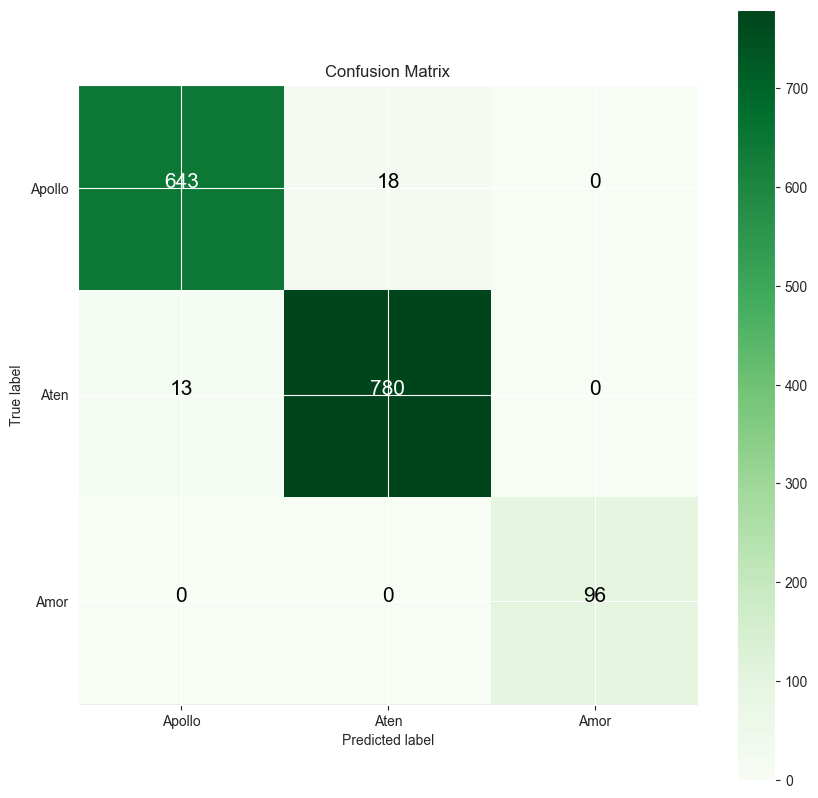

In [127]:
# View model classification report (with precision, recall and f1-score) and confusion matrix
classification_confusion_evaluation(y_test, forest_mult_y_pred, class_names)

### AdaBoost

In [128]:
# Define AdaBoost model
adaboost = AdaBoostClassifier(n_estimators=100,
                              random_state=17)

In [129]:
# Train the model
adaboost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=17)

In [130]:
# Take a prediction from the model
ada_y_pred = adaboost.predict(X_test)

#### Model Evaluation

==>Classification Report<==
              precision    recall  f1-score   support

        Amor       0.65      0.02      0.04       661
      Apollo       0.55      0.99      0.71       793
        Aten       1.00      1.00      1.00        96

    accuracy                           0.58      1550
   macro avg       0.73      0.67      0.58      1550
weighted avg       0.62      0.58      0.44      1550

==>Confusion Matrix<==
==>Model accuracy: 0.58


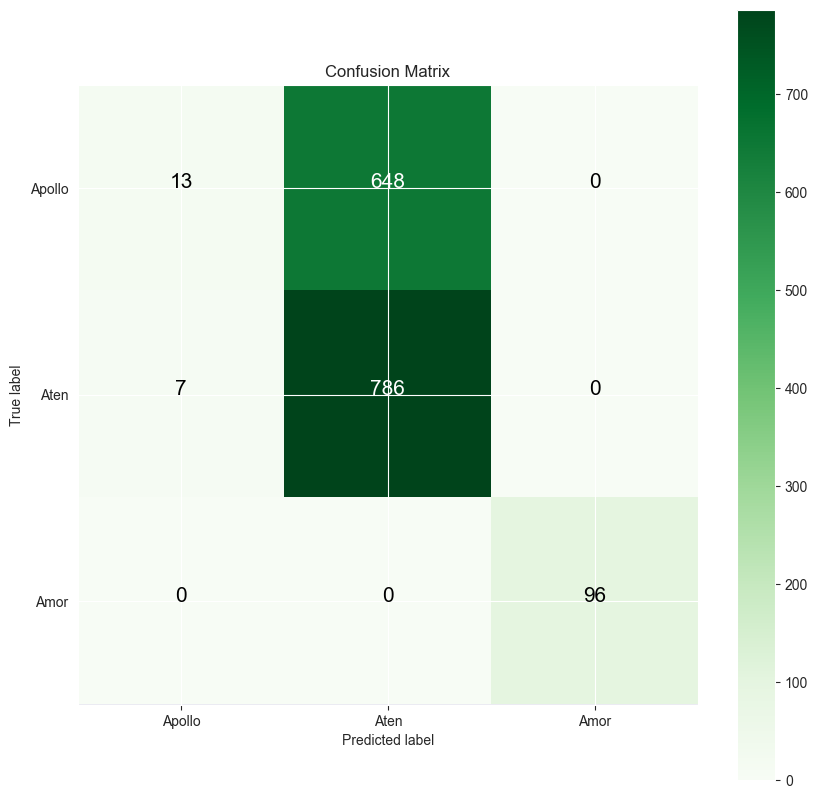

In [131]:
# View model classification report (with precision, recall and f1-score) and confusion matrix
classification_confusion_evaluation(y_test, ada_y_pred, class_names)

### kNN (K Nearest Neighbors)

In [85]:
# Standardize the variables
# Define scaler
scaler = StandardScaler()
# Fit the scaler
scaler.fit(X_train)
# Maker scaled data
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [86]:
# Define kNN model
knn_model = KNeighborsClassifier(n_neighbors=7)

In [87]:
# Train the model
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [88]:
# Take a prediction from the model
knn_y_pred = knn_model.predict(scaled_X_test)

#### Model Evaluation

==>Classification Report<==
              precision    recall  f1-score   support

        Amor       0.92      0.92      0.92       712
      Apollo       0.91      0.91      0.91       728
        Aten       0.91      0.87      0.89       110

    accuracy                           0.91      1550
   macro avg       0.91      0.90      0.91      1550
weighted avg       0.91      0.91      0.91      1550

==>Confusion Matrix<==
==>Model accuracy: 0.91


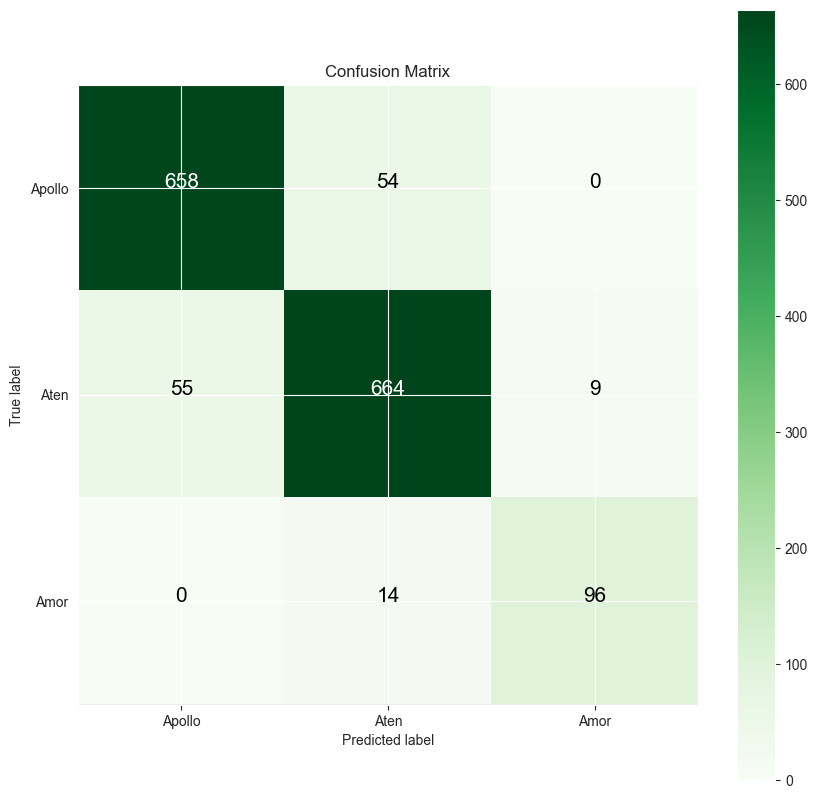

In [89]:
# View model classification report (with precision, recall and f1-score) and confusion matrix
classification_confusion_evaluation(y_test, knn_y_pred, class_names)

### SVM (Support Vector Machine)

In [90]:
# Define SVM model
svm_model = SVC(C=1.0, gamma=1.0, kernel='rbf')

In [91]:
# Train the model
svm_model.fit(scaled_X_train, y_train)

SVC(gamma=1.0)

In [94]:
# Take a prediction from the model
svm_y_pred = svm_model.predict(X_test)

D:\.main\.code\data_analysis_labs\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


#### Model Evaluation

==>Classification Report<==
              precision    recall  f1-score   support

        Amor       0.74      0.88      0.81       712
      Apollo       0.77      0.74      0.75       728
        Aten       0.00      0.00      0.00       110

    accuracy                           0.75      1550
   macro avg       0.50      0.54      0.52      1550
weighted avg       0.70      0.75      0.73      1550

==>Confusion Matrix<==
==>Model accuracy: 0.75


D:\.main\.code\data_analysis_labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\.main\.code\data_analysis_labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\.main\.code\data_analysis_labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


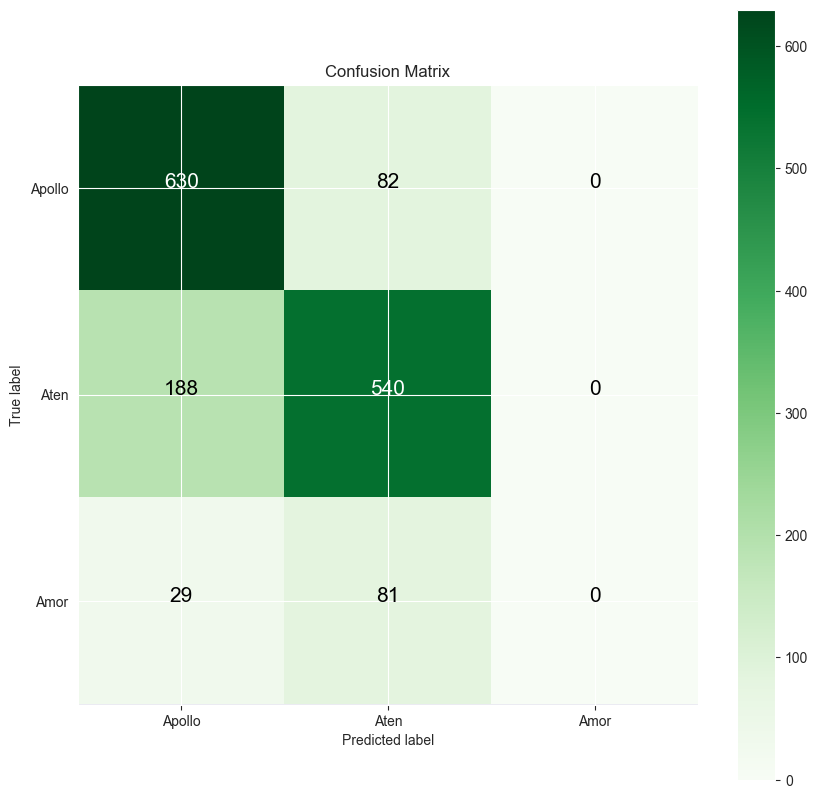

In [95]:
# View model classification report (with precision, recall and f1-score) and confusion matrix
classification_confusion_evaluation(y_test, svm_y_pred, class_names)

## Choosing optimal parameter for kNN & SVM

### kNN

In [96]:
error_rate = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train, y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

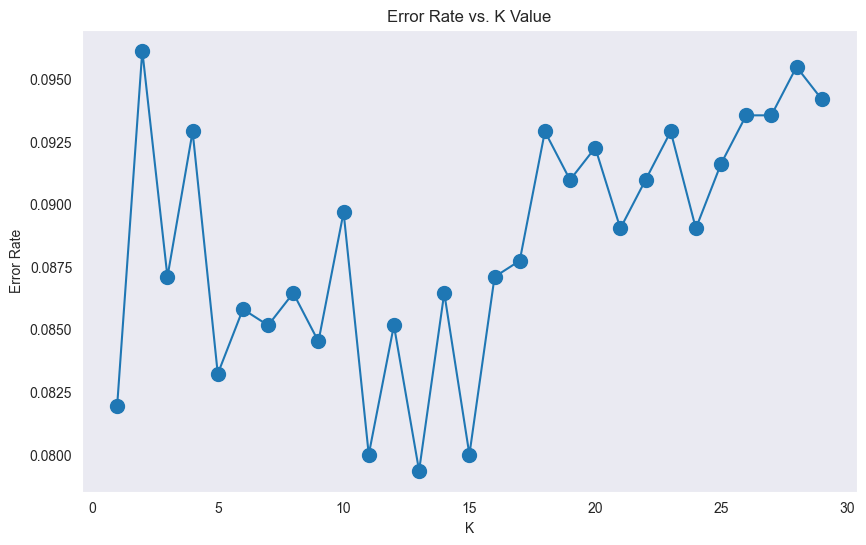

In [97]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), error_rate, marker="o", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.grid()

In [99]:
# Define kNN model with new optimal parameter n_neighbors for best result
knn_model = KNeighborsClassifier(n_neighbors=13)
# Train the model
knn_model.fit(scaled_X_train, y_train)
# Take a prediction from the model
knn_y_pred = knn_model.predict(scaled_X_test)

### SVM

In [100]:
# Make Gridsearch for find optimal parameters for SVM
param_grid = {"C": [0.1, 1, 10, 100, 1000],
              "gamma": [1, .1, .01, .001, .0001],
              "kernel": ["rbf"]}

In [101]:
# Define GridSearch
grid_search = GridSearchCV(SVC(), param_grid, refit=True)

In [102]:
# Fit the grid
grid_search.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [103]:
# View optimal parameters for SVM
grid_search.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [104]:
# View best estimation parameters
grid_search.best_estimator_

SVC(C=1000, gamma=0.01)

In [105]:
# Take a grid predictions
grid_pred = grid_search.predict(scaled_X_test)

## Choosing best model

### Classification report

#### Decision Tree

In [ ]:
print(classification_report(y_test, tree_y_pred, class_names))

#### Random Forest

In [ ]:
print(classification_report(y_test, forest_y_pred, class_names))

#### AdaBoost

In [ ]:
print(classification_report(y_test, ada_y_pred, class_names))

#### kNN

In [ ]:
print(classification_report(y_test, knn_y_pred, class_names))

#### SVM

In [ ]:
print(classification_report(y_test, svm_y_pred, class_names))

#### GridSearch (SVM)

In [ ]:
print(classification_report(y_test, grid_pred, class_names))

### Confusion matrix

#### Decision Tree

In [ ]:
make_confusion_matrix(y_test, tree_y_pred, class_names)

#### Random Forest

In [ ]:
make_confusion_matrix(y_test, forest_y_pred, class_names)

#### AdaBoost

In [ ]:
make_confusion_matrix(y_test, ada_y_pred, class_names)

#### kNN

In [ ]:
make_confusion_matrix(y_test, knn_y_pred, class_names)

#### SVM

In [ ]:
make_confusion_matrix(y_test, svm_y_pred, class_names)

#### GridSearch (SVM)

In [ ]:
make_confusion_matrix(y_test, grid_pred, class_names)

### Accuracy Score

#### Decision Tree

In [ ]:
model_accuracy = accuracy_score(y_test, tree_y_pred)
print("==>Accuracy: {:.2f}".format(model_accuracy))

#### Random Forest

In [ ]:
model_accuracy = accuracy_score(y_test, forest_y_pred)
print("==>Accuracy: {:.2f}".format(model_accuracy))

#### AdaBoost

In [ ]:
model_accuracy = accuracy_score(y_test, ada_y_pred)
print("==>Accuracy: {:.2f}".format(model_accuracy))

#### kNN

In [ ]:
model_accuracy = accuracy_score(y_test, knn_y_pred)
print("==>Accuracy: {:.2f}".format(model_accuracy))

#### SVM

In [ ]:
model_accuracy = accuracy_score(y_test, svm_y_pred)
print("==>Accuracy: {:.2f}".format(model_accuracy))

#### GridSearch (SVM)

In [ ]:
model_accuracy = accuracy_score(y_test, grid_pred)
print("==>Accuracy: {:.2f}".format(model_accuracy))

### Best model is